<a href="https://colab.research.google.com/github/Ximenaloranca/Investigaci-n-de-operaciones/blob/main/Inventario_de_varios_articulos_con_limitacion_de_almacen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inventario de varios articulos**

Vamos a resolver el ejemplo de la siguiente imagen con el modelo EOQ con restriccion de almacenamiento

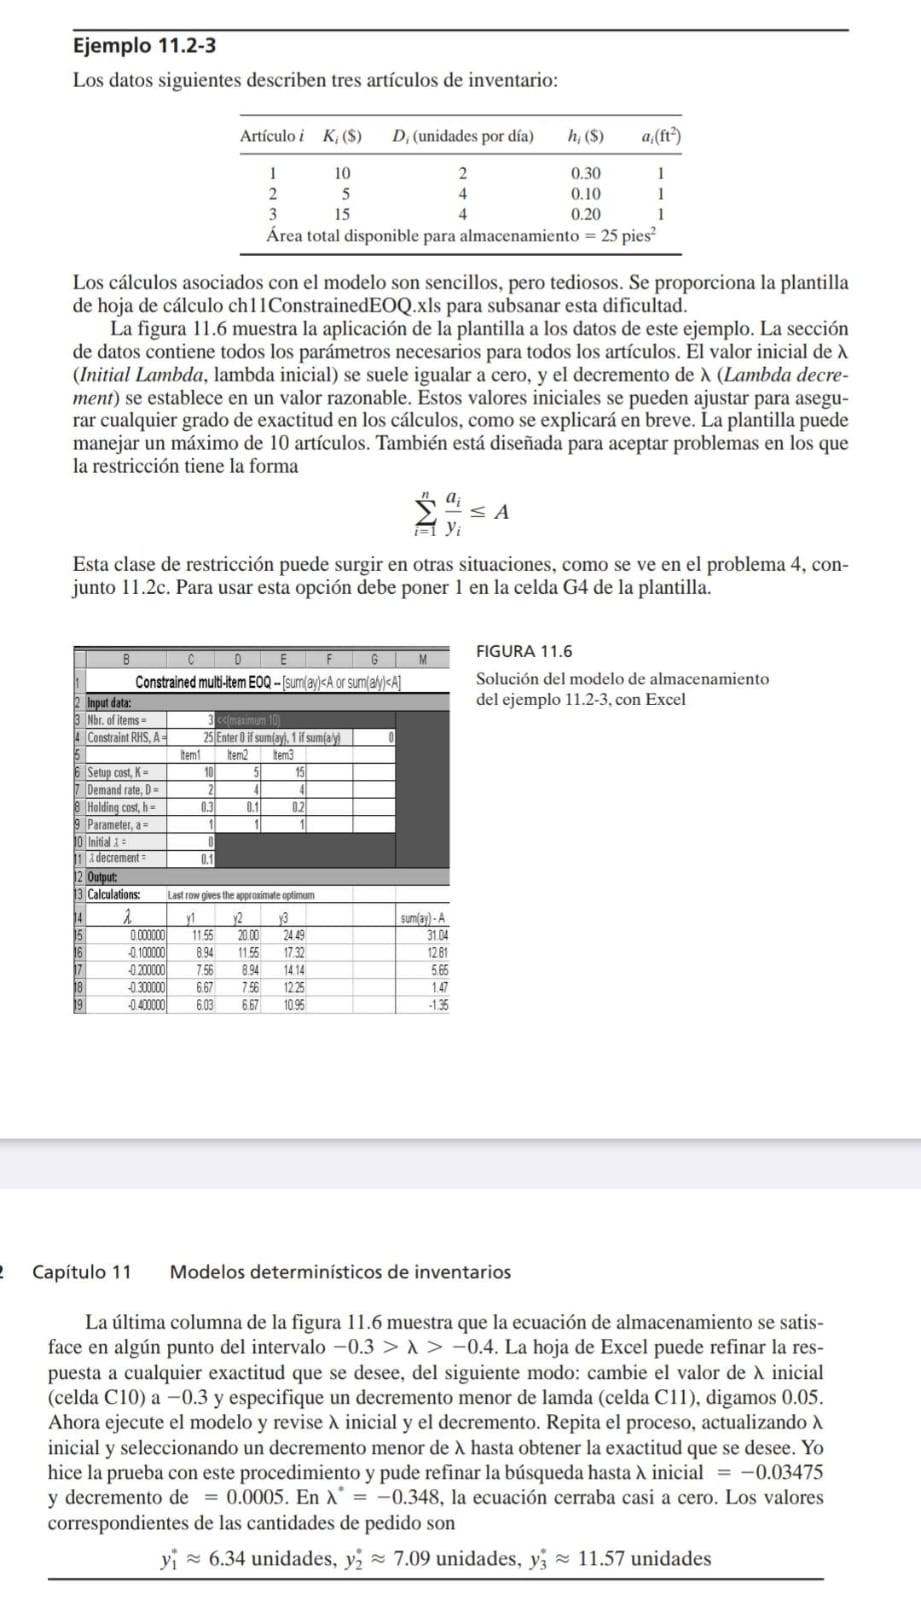

In [ ]:
# Incluimos las librerias que vamos a utilizar
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [ ]:
# Ponemos los datos del problema
datos = [
    {'id': 1, 'K': 10, 'D': 2, 'h': 0.30, 'a': 1.0},
    {'id': 2, 'K': 5,  'D': 4, 'h': 0.10, 'a': 1.0},
    {'id': 3, 'K': 15, 'D': 4, 'h': 0.20, 'a': 1.0}
]
Area_Disponible = 25.0

print(f"Area disponible: {Area_Disponible} pies²")

Area disponible: 25.0 pies²


In [ ]:
# Paso 1
# Hacemos la derivacion simbolica
y, K, D, h, a, lam = sp.symbols('y K D h a lambda')

# Costo Total Lagrangeano
L = (K * D / y) + (h * y / 2) - lam * (a * y)

# Derivamos y obtenemos la formula
dL_dy = sp.diff(L, y)
y_sol = sp.solve(dL_dy, y)[1]

sp.pprint(y_sol)

# Funcion numerica
calc_y = sp.lambdify((K, D, h, a, lam), y_sol, 'numpy')

       ___________
      ╱   -D⋅K    
√2⋅  ╱  ───────── 
   ╲╱   2⋅a⋅λ - h 



Restriccion no cumplida: 56.04 > 25.0
Lambda optimo: -0.347958
Resultados finales
           | y* (Optimo)    
------------------------------
1          | 6.3375         
2          | 7.0892         
3          | 11.5733        
------------------------------
Verificacion de area: 25.0000


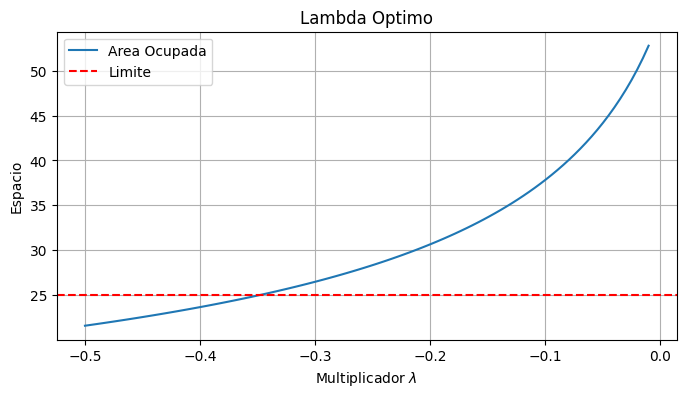

In [ ]:
# En esta parte hacemos la grafica
# Paso 2
def calcular_area_total(lambda_val):
    area_total = 0
    for item in datos:
        y_val = calc_y(item['K'], item['D'], item['h'], item['a'], lambda_val)
        area_total += y_val * item['a']
    return area_total

# Verificamos la restricción inicial
area_inicial = calcular_area_total(0)

if area_inicial > Area_Disponible:
    print(f"\nRestriccion no cumplida: {area_inicial:.2f} > {Area_Disponible}")

    # Grafica
    lambdas_plot = np.linspace(-0.5, -0.01, 100)
    areas_plot = [calcular_area_total(l) for l in lambdas_plot]

    plt.figure(figsize=(8, 4))
    plt.plot(lambdas_plot, areas_plot, label='Area Ocupada')
    plt.axhline(y=Area_Disponible, color='r', linestyle='--', label='Limite')
    plt.xlabel(r'Multiplicador $\lambda$')
    plt.ylabel('Espacio')
    plt.title('Lambda Optimo')
    plt.grid(True)
    plt.legend()
    # plt.show()
# Paso 3
    # Solucion numerica
    func_objetivo = lambda l: calcular_area_total(l) - Area_Disponible

    # Usamos opt.bisect
    lambda_opt = opt.bisect(func_objetivo, -10, -0.0001)

    print(f"Lambda optimo: {lambda_opt:.6f}")

    # Resultados finales
    print("Resultados finales")
    print(f"{'':<10} | {'y* (Optimo)':<15}")
    print("-" * 30)

    suma_area = 0
    for item in datos:
        # Calculamos el optimo
        y_opt = calc_y(item['K'], item['D'], item['h'], item['a'], lambda_opt)
        suma_area += y_opt * item['a']

        # Imprimimos el optimo
        print(f"{item['id']:<10} | {y_opt:<15.4f}")

    print("-" * 30)
    print(f"Verificacion de area: {suma_area:.4f}")

else:
    print("La solucion no es factible.")

Podemos ver que los resultados son los mismo que el ejemplo, entonces el codigo esta bien